# Predicting mercury chemical composition using albedo

As this project requires prediction of multiple elements from albedo data, a multi-output regressor is created as opposed to the multi-input regressor used for the lunar albedo predictor.

For this task, rows containing gaps are eliminated from the element datasets, leaving only "known" element values. The equivalent rows of the albedo dataset are found, allowing for a neural network to be formed that takes in albedo and outputs the element data. As the known dataset for each element is a different size, a different neural network is created per element (5 NNs in total). After training, the NNs are used to predict the element gaps. These predictions are appended to the known datasets, and then used as training data for the final NN to predict the composition of the bottom half of the planet.

In [133]:
# import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import r2_score

print(tf.__version__) # print tensorflow version

2.8.0


After importing libraries, data for the chemical ratios and albedo are read in from their csv files. The indices of each row containing a gap are found for each element database. Two modified databases are created as variables, containing the element and albedo databases with these gapped rows removed ("known" element data and corresponding albedos).

In [134]:
# obtain albedo data

albedo = pd.read_csv("mercury-albedo-top-half.csv",header=None)
albedobottom = pd.read_csv("mercury-albedo-bottom-half.csv",header=None)

albedo_train = albedo.values.flatten() # top half
albedo_test = albedobottom.values # bottom half

# aluminium data

al = pd.read_csv("MercMap_Al.csv",header=None)

al_unknown_index = al.index[(al==0).any(axis=1)] # find rows containing gaps
al_known_index = al.index[~(al==0).any(axis=1)] # find rows without gaps

al_known = al.drop(al_unknown_index).values.flatten() # drop rows containing gaps from al data

al_albedo_known = albedo.drop(al_unknown_index).values.flatten() # drop rows of same index for albedo data
al_albedo_unknown = albedo.drop(al_known_index).values.flatten()

print(np.shape(al_known))

print(al_unknown_index)

# calcium data

ca = pd.read_csv("MercMap_Ca.csv",header=None)

ca_unknown_index = ca.index[(ca==0).any(axis=1)] # find rows containing gaps
ca_known_index = ca.index[~(ca==0).any(axis=1)]

ca_known = ca.drop(ca_unknown_index).values.flatten() # drop rows containing gaps from ca data

ca_albedo_known = albedo.drop(ca_unknown_index).values.flatten() # drop rows of same index for albedo data
ca_albedo_unknown = albedo.drop(ca_known_index).values.flatten()

# iron data

fe = pd.read_csv("MercMap_Fe.csv",header=None)

fe_unknown_index = fe.index[(fe==0).any(axis=1)] # find rows containing gaps
fe_known_index = fe.index[~(fe==0).any(axis=1)]

fe_known = fe.drop(fe_unknown_index).values.flatten() # drop rows containing gaps from fe data

fe_albedo_known = albedo.drop(fe_unknown_index).values.flatten() # drop rows of same index for albedo data
fe_albedo_unknown = albedo.drop(fe_known_index).values.flatten()

# magnesium data

mg = pd.read_csv("MercMap_Mg.csv",header=None)

mg_unknown_index = mg.index[(mg==0).any(axis=1)] # find rows containing gaps
mg_known_index = mg.index[~(mg==0).any(axis=1)]

mg_known = mg.drop(mg_unknown_index).values.flatten() # drop rows containing gaps from mg data

mg_albedo_known = albedo.drop(mg_unknown_index).values.flatten() # drop rows of same index for albedo data
mg_albedo_unknown = albedo.drop(mg_known_index).values.flatten()

# sulphur data

s = pd.read_csv("MercMap_S.csv",header=None)

s_unknown_index = s.index[(s==0).any(axis=1)] # find rows containing gaps
s_known_index = s.index[~(s==0).any(axis=1)]

s_known = s.drop(s_unknown_index).values.flatten() # drop rows containing gaps from s data

s_albedo_known = albedo.drop(s_unknown_index).values.flatten() # drop rows of same index for albedo data
s_albedo_unknown = albedo.drop(s_known_index).values.flatten()

(871200,)
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            109, 113, 114, 115, 116, 142, 150, 162, 718, 719],
           dtype='int64', length=115)


The first neural network takes one input (albedo) and produces one output (an element dataset). This is repeated for each element, starting with aluminium:

In [135]:
# ALUMINIUM NN

# define and normalize input

ip_alb_al = keras.Input(shape=(1,))
norm_alb_al = layers.Normalization(input_shape=(1,),axis=None)(ip_alb_al)

# build neural network

dense1 = layers.Dense(64,activation="relu")(norm_alb_al) # 64 nodes, "relu" means nonlinear model used
dense2 = layers.Dense(64,activation="relu")(dense1) # "
output = layers.Dense(1)(dense2)

al_model = keras.Model(inputs=ip_alb_al,outputs=output) # creates model

al_model.compile(loss="mean_absolute_error",optimizer=tf.keras.optimizers.Adam(0.001))
#model.summary()

# train with known albedo and al data

al_model.fit(x=al_albedo_known,y=al_known,validation_split=0.2,verbose=0,epochs=10)

# test with albedo data corresponding to unknown al data

al_gaps = al_model.predict(al_albedo_unknown)


In [136]:
# CALCIUM NN

# define and normalize input

ip_alb_ca = keras.Input(shape=(1,))
norm_alb_ca = layers.Normalization(input_shape=(1,),axis=None)(ip_alb_ca)

# build neural network

ca_dense1 = layers.Dense(64,activation="relu")(norm_alb_ca) # 64 nodes, "relu" means nonlinear model used
ca_dense2 = layers.Dense(64,activation="relu")(ca_dense1) # "
ca_output = layers.Dense(1)(ca_dense2)

ca_model = keras.Model(inputs=ip_alb_ca,outputs=ca_output) # creates model

ca_model.compile(loss="mean_absolute_error",optimizer=tf.keras.optimizers.Adam(0.001))
#model.summary()

# train with known albedo and al data

ca_model.fit(x=ca_albedo_known,y=ca_known,validation_split=0.2,verbose=0,epochs=10)

# test with albedo data corresponding to unknown al data

ca_gaps = ca_model.predict(ca_albedo_unknown)


In [137]:
# IRON NN

# define and normalize input

ip_alb_fe = keras.Input(shape=(1,))
norm_alb_fe = layers.Normalization(input_shape=(1,),axis=None)(ip_alb_fe)

# build neural network

fe_dense1 = layers.Dense(64,activation="relu")(norm_alb_fe) # 64 nodes, "relu" means nonlinear model used
fe_dense2 = layers.Dense(64,activation="relu")(fe_dense1) # "
fe_output = layers.Dense(1)(fe_dense2)

fe_model = keras.Model(inputs=ip_alb_fe,outputs=fe_output) # creates model

fe_model.compile(loss="mean_absolute_error",optimizer=tf.keras.optimizers.Adam(0.001))
#model.summary()

# train with known albedo and al data

fe_model.fit(x=fe_albedo_known,y=fe_known,validation_split=0.2,verbose=0,epochs=10)

# test with albedo data corresponding to unknown al data

fe_gaps = fe_model.predict(fe_albedo_unknown)

In [138]:
# MAGNESIUM NN

# define and normalize input

ip_alb_mg = keras.Input(shape=(1,))
norm_alb_mg = layers.Normalization(input_shape=(1,),axis=None)(ip_alb_mg)

# build neural network

mg_dense1 = layers.Dense(64,activation="relu")(norm_alb_mg) # 64 nodes, "relu" means nonlinear model used
mg_dense2 = layers.Dense(64,activation="relu")(mg_dense1) # "
mg_output = layers.Dense(1)(mg_dense2)

mg_model = keras.Model(inputs=ip_alb_mg,outputs=mg_output) # creates model

mg_model.compile(loss="mean_absolute_error",optimizer=tf.keras.optimizers.Adam(0.001))
#model.summary()

# train with known albedo and al data

mg_model.fit(x=mg_albedo_known,y=mg_known,validation_split=0.2,verbose=0,epochs=10)

# test with albedo data corresponding to unknown al data

mg_gaps = mg_model.predict(mg_albedo_unknown)

In [139]:
# SULPHUR NN

# define and normalize input

ip_alb_s = keras.Input(shape=(1,))
norm_alb_s = layers.Normalization(input_shape=(1,),axis=None)(ip_alb_s)

# build neural network

s_dense1 = layers.Dense(64,activation="relu")(norm_alb_s) # 64 nodes, "relu" means nonlinear model used
s_dense2 = layers.Dense(64,activation="relu")(s_dense1) # "
s_output = layers.Dense(1)(s_dense2)

s_model = keras.Model(inputs=ip_alb_s,outputs=s_output) # creates model

s_model.compile(loss="mean_absolute_error",optimizer=tf.keras.optimizers.Adam(0.001))
#model.summary()

# train with known albedo and al data

s_model.fit(x=s_albedo_known,y=s_known,validation_split=0.2,verbose=0,epochs=10)

# test with albedo data corresponding to unknown al data

s_gaps = s_model.predict(s_albedo_unknown)

Next, the predictions are reshaped into rows of 1440 so that they can fit back into their respective databases.

In [140]:
#al_unknown_index = al_unknown_index.tolist()

al_gaps = np.reshape(al_gaps,(115,1440))
df_al_gaps = pd.DataFrame(al_gaps)
df_al_gaps.index = al_unknown_index
#df_al_gaps.dropna()

ca_gaps = np.reshape(ca_gaps,(364,1440))
df_ca_gaps = pd.DataFrame(ca_gaps)
df_ca_gaps.index = ca_unknown_index
#df_ca_gaps.dropna()

fe_gaps = np.reshape(fe_gaps,(554,1440))
df_fe_gaps = pd.DataFrame(fe_gaps)
df_fe_gaps.index = fe_unknown_index
#df_fe_gaps.dropna()

mg_gaps = np.reshape(mg_gaps,(101,1440))
df_mg_gaps = pd.DataFrame(mg_gaps)
df_mg_gaps.index = mg_unknown_index
#df_mg_gaps.dropna()

s_gaps = np.reshape(s_gaps,(368,1440))
df_s_gaps = pd.DataFrame(s_gaps)
df_s_gaps.index = s_unknown_index
#df_s_gaps.dropna()

The predictions are put back in their original positions in the databases.

In [141]:
# split "gaps" data into rows of length 1440, then insert them to replace al_unknown_index in al dataframe

al.update(df_al_gaps)
ca.update(df_ca_gaps)
fe.update(df_fe_gaps)
mg.update(df_mg_gaps)
s.update(df_s_gaps)



Now that we have complete element datasets, we can use them to train a second neural network to predict the element composition of the bottom half of mercury from its albedo. Training and testing data is defined using the complete datasets.

In [142]:
# define test and train data from new complete datasets

al_train = al.values.flatten() # top half
alvals = al.values

ca_train = ca.values.flatten() # top half
cavals = ca.values

fe_train = fe.values.flatten() # top half
fevals = fe.values

mg_train = mg.values.flatten() # top half
mgvals = mg.values 

s_train = s.values.flatten() # top half
svals = s.values 

This neural network takes in one input (albedo) and produces 5 outputs (aluminium, calcium, iron, magnesium and sulphur ratios). The input is defined and then normalized so that it can be passed through the following layers of the neural network.

In [143]:
# define and normalize input

ip_albedo = keras.Input(shape=(1,))
norm_albedo = layers.Normalization(input_shape=(1,),axis=None)(ip_albedo)

The neural network has two dense layers followed by five outputs connected to the second dense layer. The "relu" activation means that a non-linear regression relationship between variables will be determined.

In [144]:
# build neural network

dense1 = layers.Dense(64,activation="relu")(norm_albedo) # 64 nodes, "relu" means nonlinear model used
dense2 = layers.Dense(64,activation="relu")(dense1) # "

# create multiple outputs

output_al = layers.Dense(1)(dense2)
output_ca = layers.Dense(1)(dense2)
output_fe = layers.Dense(1)(dense2)
output_mg = layers.Dense(1)(dense2)
output_s = layers.Dense(1)(dense2)

model = keras.Model(inputs=ip_albedo,outputs=[output_al,output_ca,output_fe,output_mg,output_s]) # creates model

# compile and summary

model.compile(loss="mean_absolute_error",optimizer=tf.keras.optimizers.Adam(0.001))
#model.summary()

Next, the model is trained with the complete albedo and element datasets.

In [145]:
# train model

model.fit(x=albedo_train,y=[al_train,ca_train,fe_train,mg_train,s_train],validation_split=0.2,verbose=0,epochs=10)


Error is plotted against epoch to show how accurate the model is.

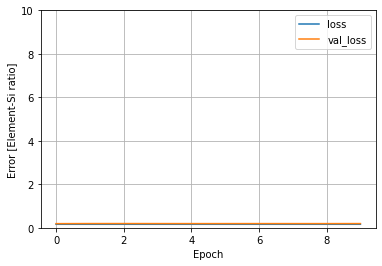

In [159]:
history = model.fit(x=albedo_train,y=[al_train,ca_train,fe_train,mg_train,s_train],validation_split=0.2,verbose=0,epochs=10)

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Element-Si ratio]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

Finally, the model is applied to the albedo test data (bottom half of the planet). The output data is a 2d array containing 5 lists of chemical ratio values. These lists are each reshaped into a 2d coordinate system with dimensions (360,1440) for plotting.

(5, 1036800, 1)
(5, 720, 1440)


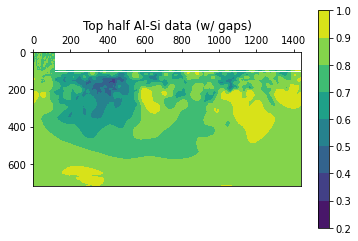

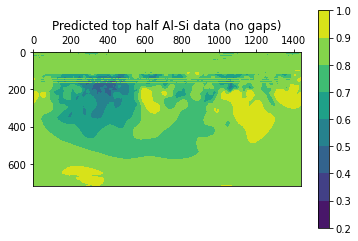

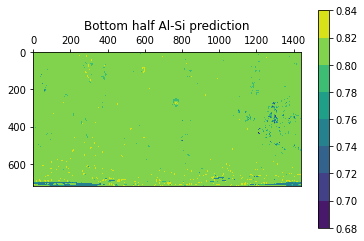

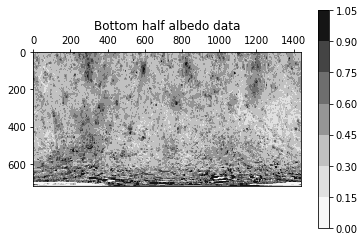

In [160]:
# predict chemical composition using test data

predicted_chems = model.predict(albedo_test.flatten())
print(np.shape(predicted_chems))

predicted_chems = np.array(predicted_chems)
predicted_chems = np.reshape(predicted_chems, (5,1036800) ) # convert 518400 into 360x1440

predicted_chems = np.hstack(predicted_chems)
predicted_chems = np.reshape(predicted_chems, (5,720,1440))

print(np.shape(predicted_chems))

# plot real data

fig, ax = plt.subplots()
ax.set_aspect(1)

ax.invert_yaxis()
ax.xaxis.tick_top()

d = ax.contourf(xvals,yvals,al_test,cmap="viridis")
ax.set_title("Top half Al-Si data (w/ gaps)")
fig.colorbar(d)
plt.show()

# plot predicted top half data

fig, ax = plt.subplots()
ax.set_aspect(1)

ax.invert_yaxis()
ax.xaxis.tick_top()

d = ax.contourf(xvals,yvals,alvals,cmap="viridis")
ax.set_title("Predicted top half Al-Si data (no gaps)")
fig.colorbar(d)
plt.show()

# plot predicted albedo

fig, ax = plt.subplots()

xvals = np.arange(0,1440,1)
yvals = np.arange(0,720,1)

# al

ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_aspect(1)
g = ax.contourf(xvals,yvals,predicted_chems[0],cmap="viridis")
ax.set_title("Bottom half Al-Si prediction")
fig.colorbar(g)
plt.show()

# plot real albedo data

fig, ax = plt.subplots()
ax.set_aspect(1)

ax.invert_yaxis()
ax.xaxis.tick_top()

a = ax.contourf(xvals,yvals,albedo_test,cmap="Greys")
ax.set_title("Bottom half albedo data")
fig.colorbar(a)
plt.show()

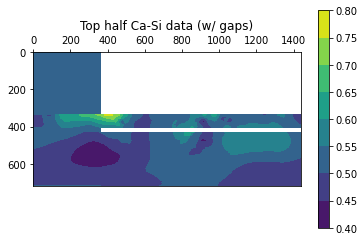

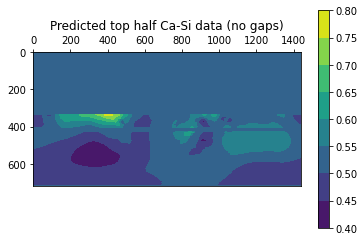

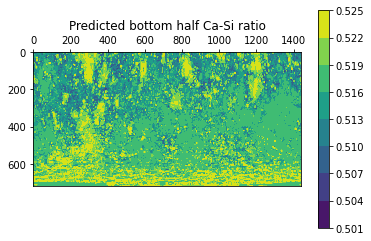

In [161]:
# plot real data

fig, ax = plt.subplots()
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_aspect(1)

d = ax.contourf(xvals,yvals,ca_test,cmap="viridis")
ax.set_title("Top half Ca-Si data (w/ gaps)")
plt.colorbar(d)
plt.show()

# plot predicted top half data

fig, ax = plt.subplots()
ax.set_aspect(1)

ax.invert_yaxis()
ax.xaxis.tick_top()

d = ax.contourf(xvals,yvals,cavals,cmap="viridis")
ax.set_title("Predicted top half Ca-Si data (no gaps)")
fig.colorbar(d)
plt.show()

# ca

fig, ax = plt.subplots()

ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_aspect(1)
g = ax.contourf(xvals,yvals,predicted_chems[1],cmap="viridis")
ax.set_title("Predicted bottom half Ca-Si ratio")
plt.colorbar(g)
plt.show()


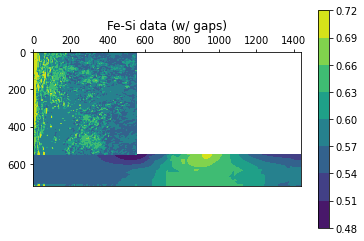

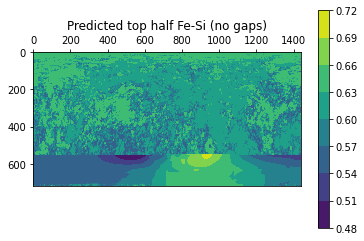

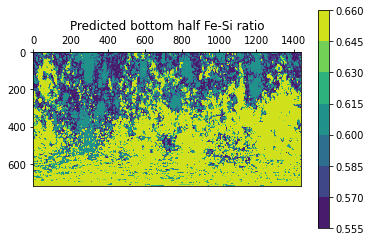

In [162]:
# plot real data

fig, ax = plt.subplots()
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_aspect(1)

d = ax.contourf(xvals,yvals,fe_test,cmap="viridis")
ax.set_title("Fe-Si data (w/ gaps)")
plt.colorbar(d)
plt.show()

# plot real data

fig, ax = plt.subplots()
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_aspect(1)

d = ax.contourf(xvals,yvals,fevals,cmap="viridis")
ax.set_title("Predicted top half Fe-Si (no gaps)")
plt.colorbar(d)
plt.show()

# fe

fig, ax = plt.subplots()

ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_aspect(1)
g = ax.contourf(xvals,yvals,predicted_chems[2],cmap="viridis")
ax.set_title("Predicted bottom half Fe-Si ratio")
plt.colorbar(g)
plt.show()

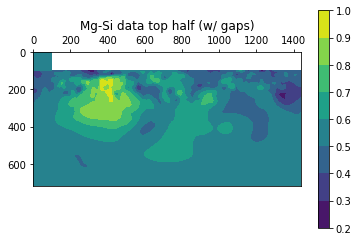

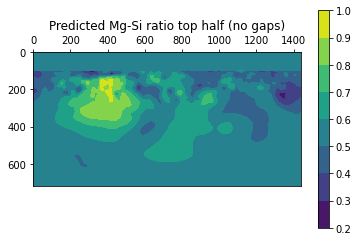

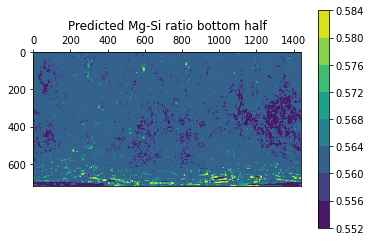

In [163]:
# plot real data

fig, ax = plt.subplots()
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_aspect(1)

d = ax.contourf(xvals,yvals,mg_test,cmap="viridis")
ax.set_title("Mg-Si data top half (w/ gaps)")
plt.colorbar(d)
plt.show()

# plot real data

fig, ax = plt.subplots()
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_aspect(1)

d = ax.contourf(xvals,yvals,mgvals,cmap="viridis")
ax.set_title("Predicted Mg-Si ratio top half (no gaps)")
plt.colorbar(d)
plt.show()

# mg

fig, ax = plt.subplots()

ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_aspect(1)
g = ax.contourf(xvals,yvals,predicted_chems[3],cmap="viridis")
ax.set_title("Predicted Mg-Si ratio bottom half")
plt.colorbar(g)
plt.show()

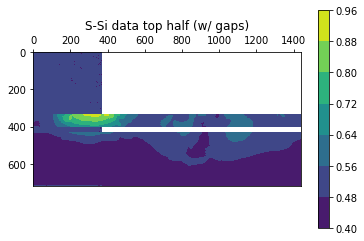

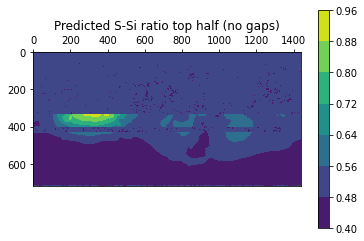

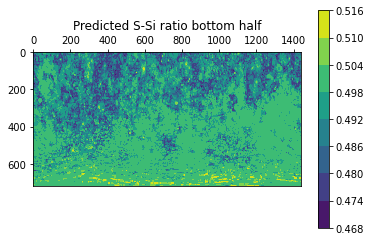

In [164]:
# plot real data

fig, ax = plt.subplots()
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_aspect(1)

d = ax.contourf(xvals,yvals,s_test,cmap="viridis")
ax.set_title("S-Si data top half (w/ gaps)")
plt.colorbar(d)
plt.show()

# plot 2

fig, ax = plt.subplots()
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_aspect(1)

d = ax.contourf(xvals,yvals,svals,cmap="viridis")
ax.set_title("Predicted S-Si ratio top half (no gaps)")
plt.colorbar(d)
plt.show()

# s

fig, ax = plt.subplots()

ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_aspect(1)
g = ax.contourf(xvals,yvals,predicted_chems[4],cmap="viridis")
ax.set_title("Predicted S-Si ratio bottom half")
plt.colorbar(g)
plt.show()